In [5]:
%matplotlib inline
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from lib.pca import calc_pca

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
cols = [ "CRIM" , "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "TGT"]
boston = pd.read_csv(url, sep = ' ', skipinitialspace = True, header = None, names = cols, index_col = False)

u, s, vh = calc_pca(boston)

### Singular values:

In [6]:
s

array([57.49543232, 28.8619752 , 26.09976038, 21.15898471, 20.72930816,
       18.25665469, 16.44331032, 14.26722377, 11.83292482, 11.28671816,
       10.36624696,  9.61294373,  8.22647535,  5.51950744])

### Eigenvalues:
(https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca)

In [7]:
ev_tmp = []
for val in s:
    ev_tmp.append((val * val) / (boston.shape[0] - 1))
    
ev = np.array(ev_tmp)
ev

array([6.54598958, 1.64953191, 1.34890592, 0.88653987, 0.85089944,
       0.66001077, 0.5354108 , 0.40307658, 0.27726358, 0.25225744,
       0.21279025, 0.1829875 , 0.1340097 , 0.06032666])

### Percentage of variance covered by each component: 

In [8]:
var_sum = np.sum(ev)
perc_tmp = []
for val in ev:
    perc_tmp.append(val / var_sum)
    
perc = np.array(perc_tmp)
perc

array([0.46757068, 0.11782371, 0.09635042, 0.06332428, 0.06077853,
       0.04714363, 0.03824363, 0.02879118, 0.01980454, 0.01801839,
       0.0151993 , 0.01307054, 0.00957212, 0.00430905])

### Cumulative sum of variance covered:

In [9]:
cum_perc = np.cumsum(perc)
cum_perc

array([0.46757068, 0.58539439, 0.68174481, 0.74506909, 0.80584762,
       0.85299125, 0.89123488, 0.92002606, 0.9398306 , 0.95784899,
       0.9730483 , 0.98611883, 0.99569095, 1.        ])

### Overview:

In [10]:
ovw = np.stack((ev, perc, cum_perc), axis=1)
pd.DataFrame(ovw, columns=["Eigenvalue", "Percentage", "Cumulative Percentage"])

,Eigenvalue,Percentage,Cumulative Percentage
0,6.545990,0.467571,0.467571
1,1.649532,0.117824,0.585394
2,1.348906,0.096350,0.681745
3,0.886540,0.063324,0.745069
4,0.850899,0.060779,0.805848
5,0.660011,0.047144,0.852991
6,0.535411,0.038244,0.891235
7,0.403077,0.028791,0.920026
8,0.277264,0.019805,0.939831
9,0.252257,0.018018,0.957849


### Correlation of projections to first 3 PCs:

In [11]:
s_diag = np.diag(s)
us = u @ s_diag
us.shape

(506, 14)

In [12]:
corrs = []
for col in boston:
    corrs_tmp = [col]
    for x in range(3):
        corrs_tmp.append(np.corrcoef(boston[col].to_numpy(), us[:,x])[0,1])
    corrs.append(corrs_tmp)

pd.DataFrame(corrs, columns=["Variable", "PC1", "PC2", "PC3"])

,Variable,PC1,PC2,PC3
0,CRIM,0.619888,-0.084604,0.458852
1,ZN,-0.627949,-0.190086,0.458235
2,INDUS,0.849068,0.163208,-0.076749
3,CHAS,-0.012862,0.527439,-0.145533
4,NOX,0.832013,0.326578,-0.053978
5,RM,-0.518909,0.557411,0.410454
6,AGE,0.759818,0.334318,-0.233241
7,DIS,-0.762871,-0.461271,0.182423
8,RAD,0.776286,0.040007,0.486068
9,TAX,0.829043,0.011368,0.398638


### Plotting first and second variable:

In [13]:
med = boston["TGT"].median()
c = []
for row in boston["TGT"]:
    if row == med:
        c.append(1)
    elif row > med:
        c.append(2)
    else:
        c.append(0)
        
scatter_data = np.stack((us[:,0], us[:,1], c), axis=1)

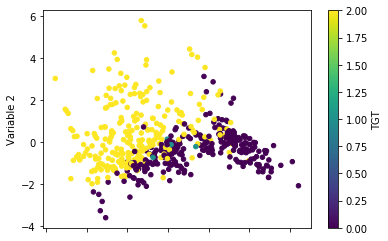

In [14]:
df = pd.DataFrame(scatter_data, columns=["Variable 1", "Variable 2", "TGT"])
df.plot.scatter(x="Variable 1", y="Variable 2", c="TGT", colormap="viridis")

The two variables can be used to predict the target price. We can see two clusters of data, which can be seperated by a line. However the clusters are not strictly seperated so there will be an error in the prediction.